In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model  # will be using for plotting trend line
from sklearn.preprocessing import MinMaxScaler # for normalizing data
from sklearn.cluster import KMeans 
pd.set_option('display.max_rows', 1000)
%matplotlib inline
from difflib import SequenceMatcher
import seaborn as sn

In [4]:
data = pd.read_csv('spotify_billboard_final.csv')
data.shape

(148556, 22)

In [5]:
# data.head()

In [6]:
data["pop_artist"].value_counts()


1    93386
0    55170
Name: pop_artist, dtype: int64

In [7]:
data["Top100"].value_counts()

0    143239
1      5317
Name: Top100, dtype: int64

In [8]:
data["artist_already_pop"].value_counts()

0    125369
1     23187
Name: artist_already_pop, dtype: int64

C:\Users\davrb\anaconda3\lib\site-packages\pandas\core\indexes\base.py:3941: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


                    pop_artist    Top100  artist_already_pop
acousticness         -0.115622 -0.089744           -0.078129
danceability          0.052218  0.083093            0.036491
duration_ms          -0.035218 -0.003519           -0.012056
energy                0.074676  0.068702            0.054560
explicit             -0.067091 -0.002227           -0.016959
instrumentalness     -0.131032 -0.075556           -0.079942
key                  -0.005910 -0.000044            0.000023
liveness              0.004831 -0.029715           -0.014836
loudness              0.087284  0.077485            0.067703
mode                  0.034677 -0.002426            0.017400
popularity            0.112879  0.163900            0.132986
speechiness          -0.097623 -0.027403           -0.055389
tempo                 0.039251  0.012534            0.024114
valence               0.070488  0.056533            0.028281
year                  0.026763  0.078807            0.094229
pop_artist            1.

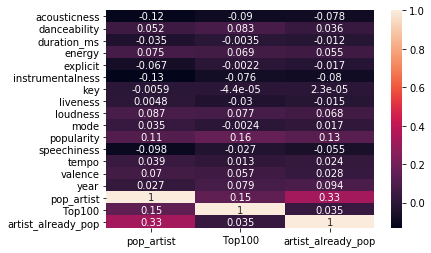

In [9]:
# correlation_matrix = data.corr()
# correlation_matrix = correlation_matrix.drop(correlation_matrix.columns[[range(15)]], axis=1)
# print (correlation_matrix)
# sn.heatmap(correlation_matrix, annot=True)
# plt.show() 

In [14]:
Top100 = data[data['Top100']==1]

In [15]:
Top100[Top100['name'] == 'Pompeii']

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,name,popularity,release_date,speechiness,tempo,valence,year,pop_artist,Top100,artist_already_pop
22430,0.0676,['Bastille'],0.659,213333,0.791,0,25wr96uXxmUFuPQdaRS0HR,0.0,9,0.286,...,Pompeii,13,2020-06-12,0.0460,127.421,0.520,2020,1,1,0
22433,0.0676,['Bastille'],0.659,213333,0.791,0,4h8lkGjwtPgr9Y4gus372y,0.0,9,0.286,...,Pompeii,1,2020-06-12,0.0460,127.421,0.520,2020,1,1,0
44161,0.0749,['Bastille'],0.681,214148,0.709,0,7Fw5i56my24ZBnGS7hFX2n,0.0,9,0.266,...,Pompeii,59,2013-01-01,0.0410,127.440,0.591,2013,1,1,0
51370,0.0755,['Bastille'],0.679,214148,0.715,0,4Ub8UsjWuewQrPhuepfVpd,0.0,9,0.271,...,Pompeii,71,2013-01-01,0.0407,127.435,0.571,2013,1,1,0
80517,0.0755,['Bastille'],0.679,214148,0.715,0,3gbBpTdY8lnQwqxNCcf795,0.0,9,0.271,...,Pompeii,71,2013-01-01,0.0407,127.435,0.571,2013,1,1,0


In [30]:
data_mins = data.groupby(['name', 'artists'],as_index=False).min()

In [34]:
data_avg[data_avg['name'] == 'Pompeii']

,name,artists,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,pop_artist,Top100,artist_already_pop
88169,Pompeii,['Bastille'],0.07222,0.6714,213822.0,0.7442,0.0,0.0,9.0,0.276,-5.6196,1.0,43.0,0.04288,127.4304,0.5546,2013,1.0,1.0,0.0


In [35]:
data_avg = data.groupby(['name', 'artists'],as_index=False).mean()
data_avg

,name,artists,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,pop_artist,Top100,artist_already_pop
0,!Que Vida! - Mono Version,['Love'],0.525000,0.600,220560.0,0.540,0.0,0.003050,9.0,0.1000,-11.803,1.0,26.0,0.0328,125.898,0.547,1966.0,0.0,0.0,0.0
1,"""40""",['U2'],0.228000,0.368,157840.0,0.480,0.0,0.707000,8.0,0.1590,-11.605,1.0,21.0,0.0306,150.166,0.338,1983.0,0.0,0.0,0.0
2,"""40"" - Live",['U2'],0.099800,0.272,226200.0,0.684,0.0,0.014500,8.0,0.9460,-9.728,1.0,41.0,0.0505,143.079,0.279,1983.0,0.0,0.0,0.0
3,"""40"" - Remastered 2008",['U2'],0.185000,0.371,157667.0,0.545,0.0,0.582000,8.0,0.1830,-9.315,1.0,36.0,0.0307,150.316,0.310,1983.0,0.0,0.0,0.0
4,"""45""",['The Gaslight Anthem'],0.000696,0.315,202493.0,0.970,0.0,0.000000,8.0,0.2770,-4.709,1.0,48.0,0.1020,178.068,0.423,2012.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137009,텅 빈 마음 Empty Heart,['LEE SEUNG HWAN'],0.429000,0.547,249893.0,0.304,0.0,0.000000,11.0,0.1430,-14.326,0.0,35.0,0.0336,74.164,0.157,1989.0,0.0,0.0,0.0
137010,피카부 Peek-A-Boo,['Red Velvet'],0.086800,0.839,189050.0,0.902,0.0,0.002570,1.0,0.2720,-3.612,0.0,69.0,0.0536,114.953,0.639,2017.0,1.0,0.0,0.0
137011,행복 (Happiness),['Red Velvet'],0.323000,0.727,220987.0,0.871,0.0,0.000006,10.0,0.7250,-3.099,0.0,58.0,0.1580,121.438,0.681,2014.0,1.0,0.0,0.0
137012,"헤어지지 못하는 여자, 떠나가지 못하는 남자 Can't Breakup Girl, C...","['Leessang', 'Jung In']",0.150000,0.523,284627.0,0.841,0.0,0.000000,10.0,0.1640,-2.505,0.0,52.0,0.3310,173.903,0.383,2009.0,0.0,0.0,0.0


In [36]:
data_final = data_avg

In [37]:
data_final['year'] = data_mins['year']

In [39]:
data_final.to_csv('final_cleaned_spotify.csv')